In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
import math
import netCDF4
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH="Stochastic/BFGS/"

SW=os.listdir(f"{PATH}")
list_table=[PATH+SW[i]+"/table.html" for i in range(len(SW))]
list_table=sorted(list_table)

In [3]:
Table = pd.DataFrame(columns=['Run','PARAMETER','FG','POST'])

for i in range(len(list_table)):
    try:
        ds=pd.read_html(list_table[i],header=0)[0]
        ds['Run']=list_table[i]
        data=ds[['Run','PARAMETER','FG','POST']][:6]
        Table=pd.concat([Table,data])
#         print(list_table[i])
#         print('____________________')
    except ImportError:
        print(list_table[i])
    
Table["FG"]=Table["FG"].astype(float)
Table["POST"]=Table["POST"].astype(float)

In [4]:
names=dict()
key="VCMAX25__06"
value=r"$VC_{max}$"
names[key]=value
key="SLA__06"
value=r"$SLA$"
names[key]=value
key="RS_SCALE"
value=r"$rs*$"
names[key]=value
key="HYDROL_HUMCSTE__06"
value=r"$z$"
names[key]=value
key="SOIL_Q10"
value=r"$Q_{10}$"
names[key]=value
key="LEAFAGECRIT__06"
value=r"$L_{agecrit}$"
names[key]=value

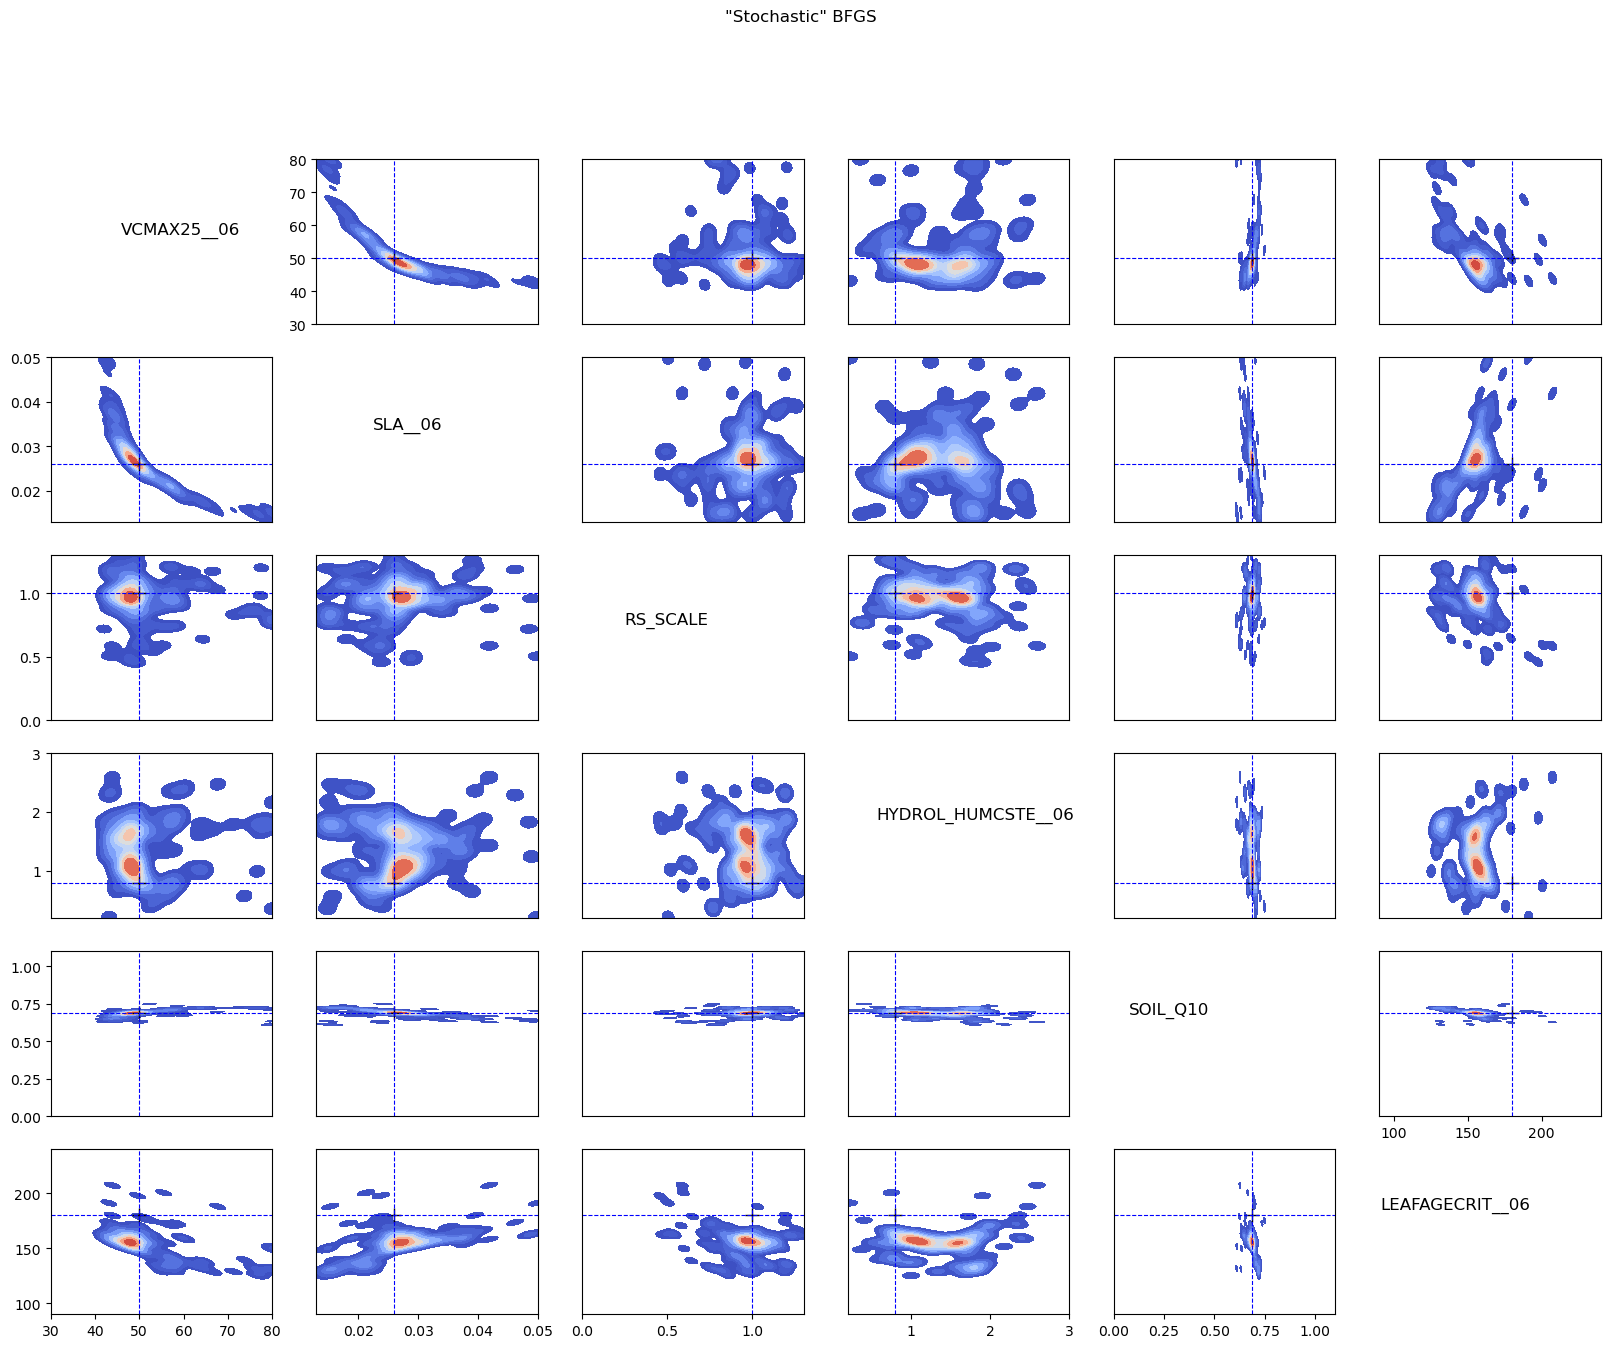

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=6,sharex=False,sharey=False,figsize=(20,15))
scale=dict()
key="VCMAX25__06"
value=[30,80]
scale[key]=value
key="SLA__06"
value=[0.013,0.05]
scale[key]=value
key="RS_SCALE"
value=[0, 1.3]
scale[key]=value
key="HYDROL_HUMCSTE__06"
value=[0.2, 3.0]
scale[key]=value
key="SOIL_Q10"
value=[0, 1.1]
scale[key]=value
key="LEAFAGECRIT__06"
value=[90, 240]
scale[key]=value


true=[50,0.026,1,0.8,0.69,180]
params=Table['PARAMETER'].unique()
to_del=[]
for i in range(len(params)):
    for j in range(len(params)):
        if i <j:
            data1 = Table.loc[Table['PARAMETER'] == params[j]]
            data2 = Table.loc[Table['PARAMETER'] == params[i]]
#             h=ax[i,j].hist2d(data1['POST'],data2['POST'],bins=20,cmap='ocean_r',vmin=0, vmax=10)
            sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="coolwarm", shade=True, bw_adjust=0.5,ax=ax[i,j])
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[i,j].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
        elif i == j:
            to_del.append([i,j])
        else: 
            data1 = Table.loc[Table['PARAMETER'] == params[j]]
            data2 = Table.loc[Table['PARAMETER'] == params[i]]

            sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="coolwarm", shade=True, bw_adjust=0.5,ax=ax[i,j])
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[i,j].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
for z in to_del:fig.delaxes(ax[z[0],z[1]])

for i in range(6): plt.text(0.16+((0.80-0.17)/5)*i,0.83-((0.80-0.15)/5)*i, params[i], fontsize = 12,transform=fig.transFigure)
fig.suptitle(f'"Stochastic" BFGS')


for i in range(5):
    for j in range(5):
        ax[i,j].xaxis.set_visible(False)

for i in range(1,6):
    for j in range(1,6):
        ax[i,j].yaxis.set_visible(False)

for i in range(2,6):ax[0,i].yaxis.set_visible(False)
for i in range(0,4):ax[i,5].xaxis.set_visible(False)


In [6]:
Table.loc[Table['PARAMETER'] == params[0]]

,Run,PARAMETER,FG,POST
0,Stochastic/BFGS/L-BFGS-B_1/table.html,VCMAX25__06,39.60,57.55
0,Stochastic/BFGS/L-BFGS-B_10/table.html,VCMAX25__06,58.77,47.45
0,Stochastic/BFGS/L-BFGS-B_100/table.html,VCMAX25__06,74.07,48.74
0,Stochastic/BFGS/L-BFGS-B_101/table.html,VCMAX25__06,62.27,48.43
0,Stochastic/BFGS/L-BFGS-B_102/table.html,VCMAX25__06,70.60,49.42
...,...,...,...,...
0,Stochastic/BFGS/L-BFGS-B_95/table.html,VCMAX25__06,58.45,48.49
0,Stochastic/BFGS/L-BFGS-B_96/table.html,VCMAX25__06,73.04,56.77
0,Stochastic/BFGS/L-BFGS-B_97/table.html,VCMAX25__06,30.51,52.37
0,Stochastic/BFGS/L-BFGS-B_98/table.html,VCMAX25__06,48.01,46.83


NameError: name 'params' is not defined

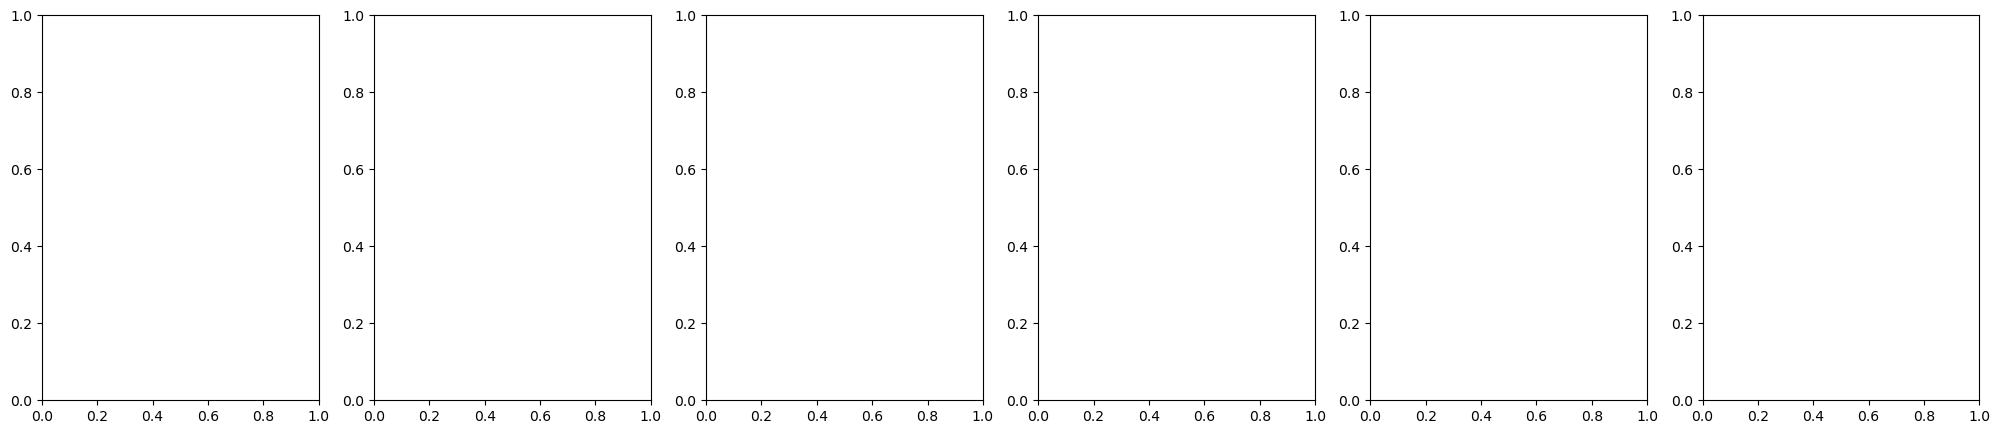

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=6,sharex=False,sharey=False,figsize=(25,5))
ax=ax.flatten()
 
for i in range(6):
    data= Table.loc[Table['PARAMETER'] == params[i]]
    ax[i].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
#     ax[i].scatter(data['FG'],[l for l in range(len(data['POST']))],linewidths = 1,marker ="1",color ="#000000",s = 50)

    ax[i].set_xlim(scale[params[i]])
    ax[i].set_title(f'{params[i]}')
    ax[i].axvline(x = true[i] , color = 'b')

fig.suptitle('BFGS')

In [7]:
PATH="Stochastic/BFGS/"


SW=os.listdir(f"{PATH}")
out="/output_*.nc"

nee=[]
le=[]

nee_post=[]
le_post=[]

SW=os.listdir(f"{PATH}")
for each in SW:
    path=PATH+each+out
    file=os.popen(f"ls {path}").read()
    file=file.replace('\n','')
    ds=netCDF4.Dataset(file)
    try:
        nee.append(ds['data_site0_var0'][:][1].data)
        le.append(ds['data_site0_var1'][:][1].data)
        nee_post.append(ds['data_site0_var0'][:][3].data)
        le_post.append(ds['data_site0_var1'][:][3].data)
        
    except IndexError:
        print('IndexError')
        
dsle=pd.DataFrame(le).transpose()
dsnee=pd.DataFrame(nee).transpose()

dslep=pd.DataFrame(le_post).transpose()
dsneep=pd.DataFrame(nee_post).transpose()

ds=netCDF4.Dataset("/home/surface5/nraoult/HistoryMatching_pv3/prior_FR-FON_2005_noise_NEE.nc")

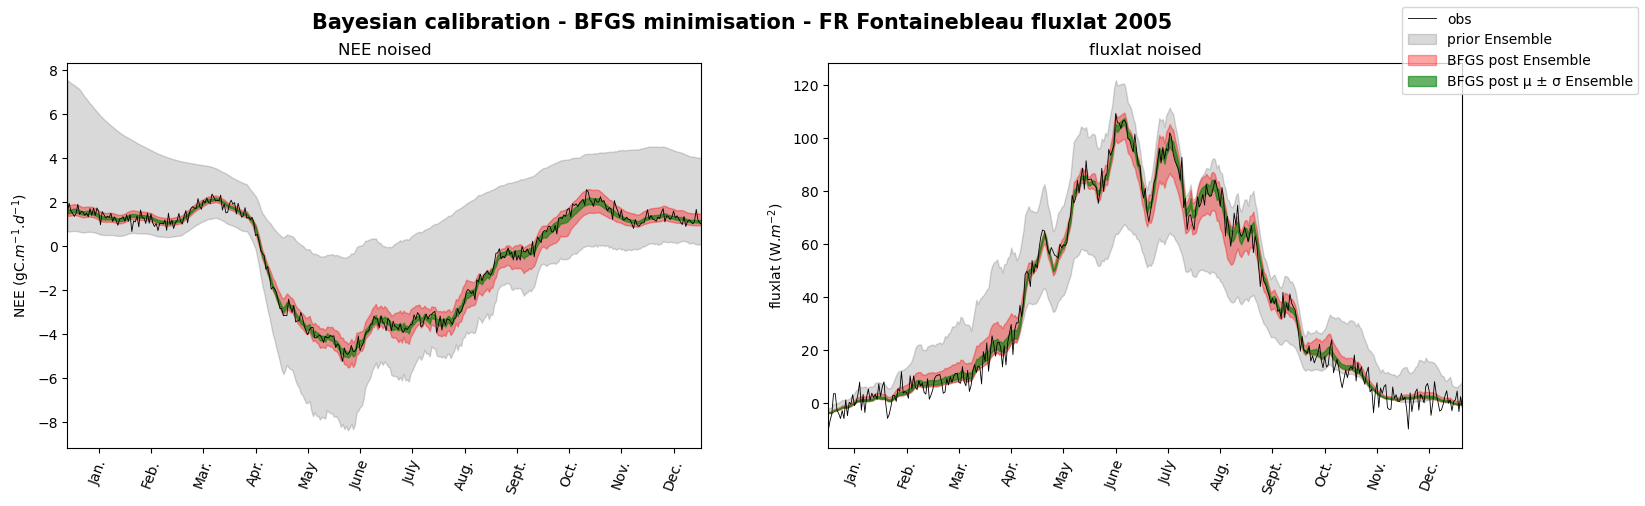

In [8]:

fig, ax = plt.subplots(nrows=1, ncols=2,sharex=False,sharey=False,figsize=(18,5))
ax = ax.flatten()


ax[0].plot(ds["NEEt_noise"][:],color='black',lw=0.6,label='obs')
ax[0].fill_between([i for i in range(365)],dsnee.quantile(0.00,axis=1),dsnee.quantile(1,axis=1),color='black',alpha=0.15,label='prior Ensemble')
ax[0].fill_between([i for i in range(365)],dsneep.quantile(0.00,axis=1),dsneep.quantile(1,axis=1),color='red',alpha=0.35,label='BFGS post Ensemble')
ax[0].fill_between([i for i in range(365)],dsneep.mean(axis=1)-dsneep.std(axis=1),dsneep.mean(axis=1)+dsneep.std(axis=1),color='green',alpha=0.6,label='BFGS post μ ± σ Ensemble')

ax[0].set_xticks([18+30*i for i in range(12)])
ax[0].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','June','July','Aug.','Sept.','Oct.','Nov.','Dec.'],rotation=70)
ax[0].set_title('NEE noised')
ax[0].set_ylabel(r'NEE (gC.$m^{-1}$.$d^{-1}$)')

ax[1].plot(ds["fluxlat_noise"][:],color='black',lw=0.6)
ax[1].fill_between([i for i in range(365)],dsle.quantile(0,axis=1),dsle.quantile(1,axis=1),color='black',alpha=0.15)
ax[1].fill_between([i for i in range(365)],dslep.quantile(0,axis=1),dslep.quantile(1,axis=1),color='red',alpha=0.35)
ax[1].fill_between([i for i in range(365)],dslep.mean(axis=1)-dslep.std(axis=1),dslep.mean(axis=1)+dslep.std(axis=1),color='green',alpha=0.6)

ax[1].set_xticks([15+30*i for i in range(12)])
ax[1].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','June','July','Aug.','Sept.','Oct.','Nov.','Dec.'],rotation=70)
ax[1].set_title('fluxlat noised')
ax[1].set_ylabel(r'fluxlat (W.$m^{-2}$)')


fig.suptitle('Bayesian calibration - BFGS minimisation - FR Fontainebleau fluxlat 2005',fontweight ="bold",fontsize=15)
fig.legend()

for i in range(2):ax[i].margins(x=0.0)
    
plt.savefig('ArticlePlots/Stochastic_BFGS_unc_TS')

In [9]:
PATH="Stochastic/GA/"

SW=os.listdir(f"{PATH}")
list_table=[PATH+SW[i]+"/table.html" for i in range(len(SW))]
list_table=sorted(list_table)

In [10]:
Table2 = pd.DataFrame(columns=['Run','PARAMETER','FG','POST'])

for i in range(len(list_table)):
    try:
        ds=pd.read_html(list_table[i],header=0)[0]
        ds['Run']=list_table[i]
        data=ds[['Run','PARAMETER','FG','POST']][:6]
        Table2=pd.concat([Table2,data])
#         print(list_table[i])
#         print('____________________')
    except ImportError:
        print(list_table[i])
    
Table2["FG"]=Table2["FG"].astype(float)
Table2["POST"]=Table2["POST"].astype(float)

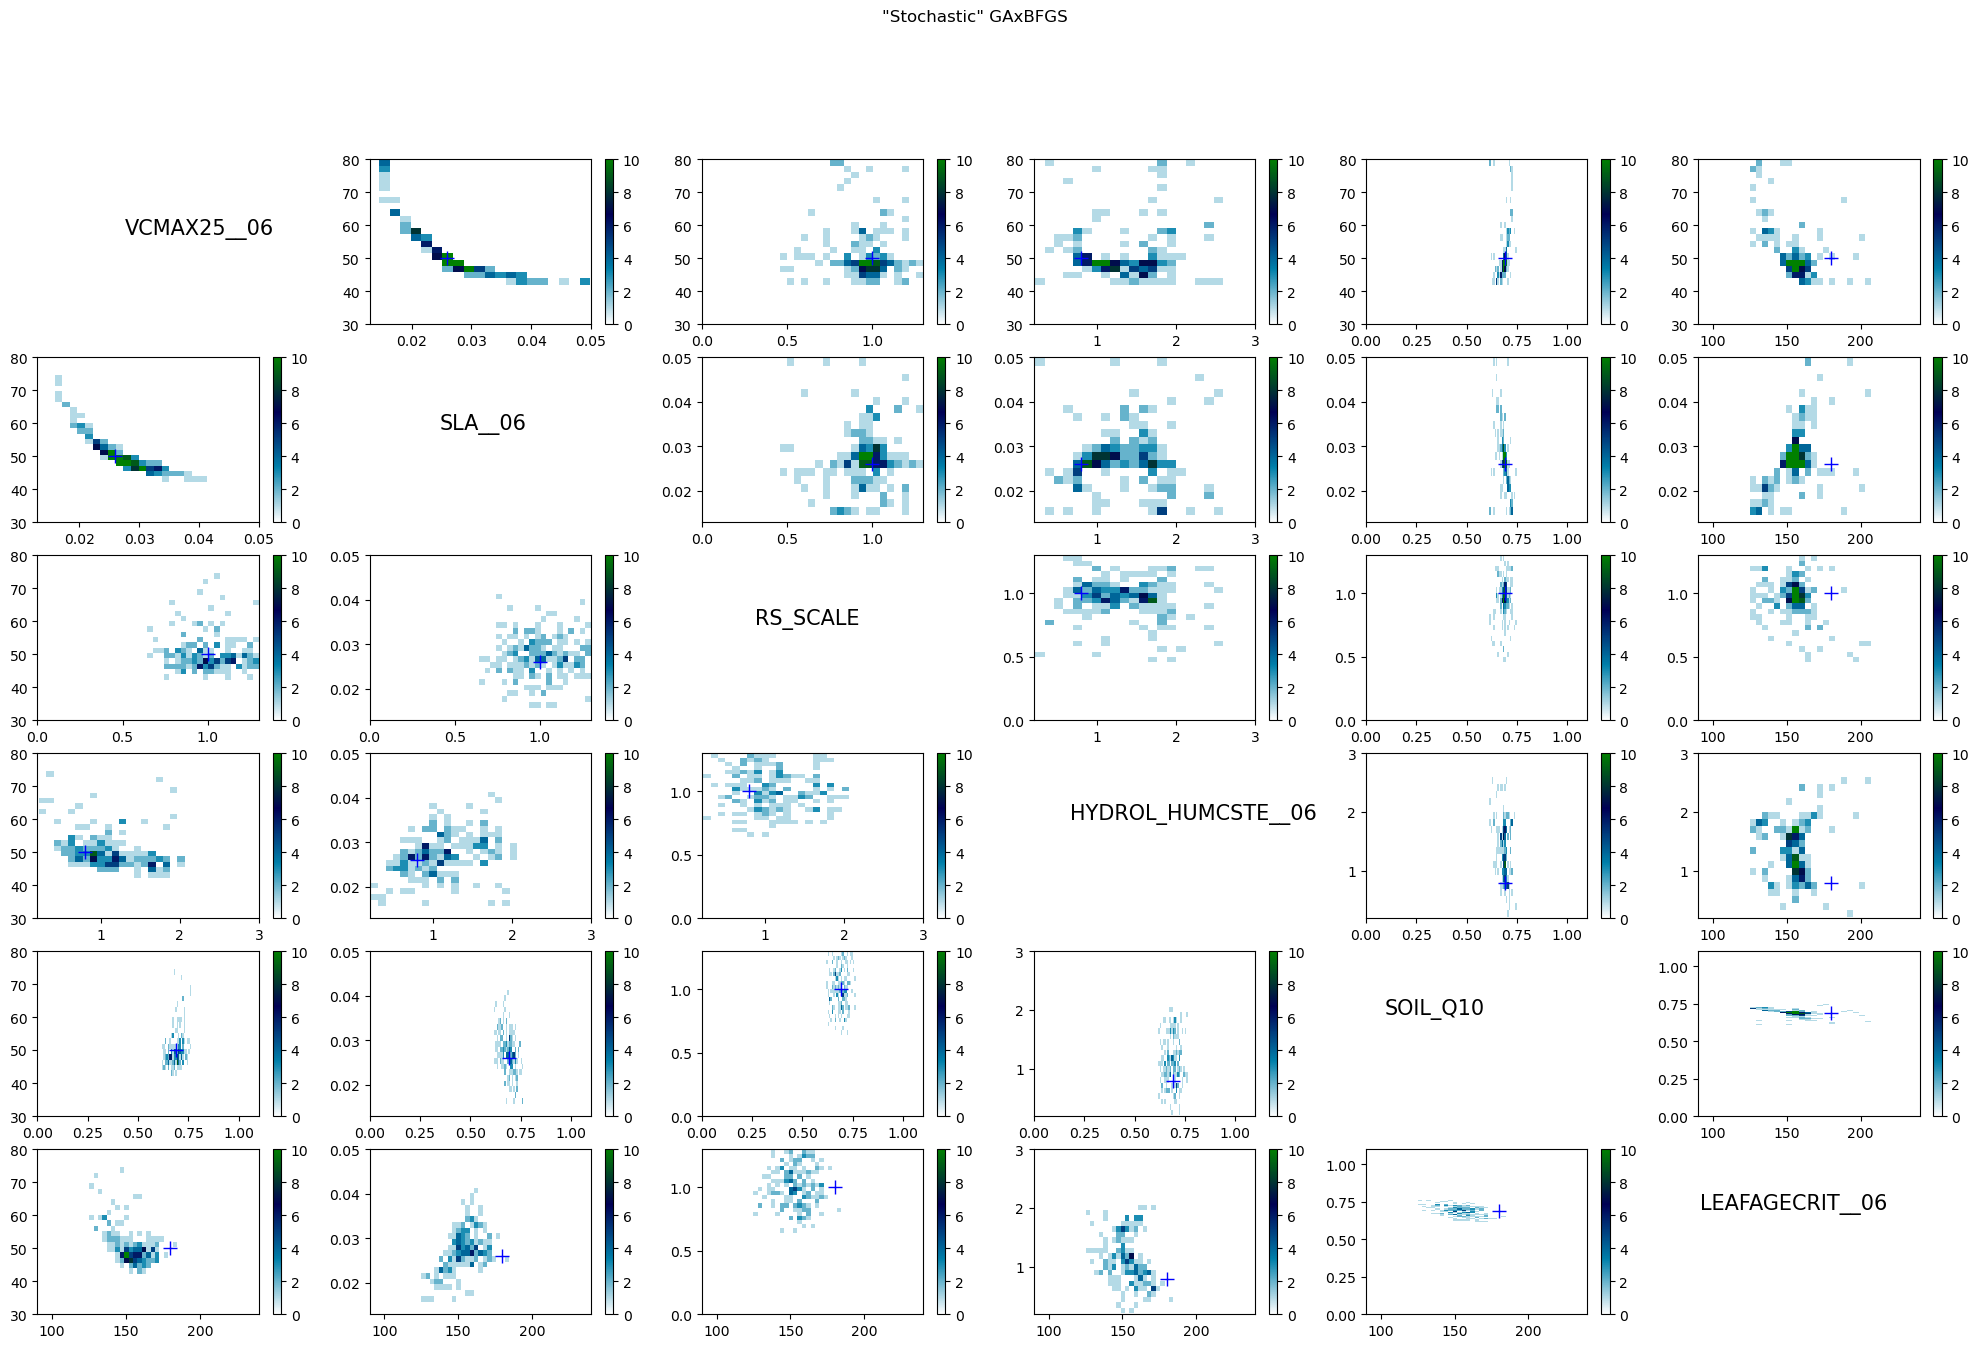

In [8]:
fig, ax = plt.subplots(nrows=6, ncols=6,sharex=False,sharey=False,figsize=(25,15))
scale=dict()
key="VCMAX25__06"
value=[30,80]
scale[key]=value
key="SLA__06"
value=[0.013,0.05]
scale[key]=value
key="RS_SCALE"
value=[0, 1.3]
scale[key]=value
key="HYDROL_HUMCSTE__06"
value=[0.2, 3.0]
scale[key]=value
key="SOIL_Q10"
value=[0, 1.1]
scale[key]=value
key="LEAFAGECRIT__06"
value=[90, 240]
scale[key]=value


true=[50,0.026,1,0.8,0.69,180]
params=Table['PARAMETER'].unique()
to_del=[]
for i in range(len(params)):
    for j in range(len(params)):
        if i <j:
            data1 = Table.loc[Table['PARAMETER'] == params[j]]
            data2 = Table.loc[Table['PARAMETER'] == params[i]]
            h=ax[i,j].hist2d(data1['POST'],data2['POST'],bins=20,cmap='ocean_r',vmin=0, vmax=10)
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#0000FF",s = 100)

            fig.colorbar(h[3],ax=ax[i,j])
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
        elif i == j:
            to_del.append([i,j])
        else: 
            
            data1 = Table2.loc[Table2['PARAMETER'] == params[i]]
            data2 = Table2.loc[Table2['PARAMETER'] == params[j]]
            h=ax[i,j].hist2d(data1['POST'],data2['POST'],bins=20,cmap='ocean_r',vmin=0, vmax=10)
            ax[i,j].scatter(true[i],true[j],linewidths = 1,marker ="+",color ="b",s = 100)

            fig.colorbar(h[3],ax=ax[i,j])
            ax[i,j].set_ylim(scale[params[j]][0],scale[params[j]][1])
            ax[i,j].set_xlim(scale[params[i]][0], scale[params[i]][1])
for z in to_del:fig.delaxes(ax[z[0],z[1]])

for i in range(6): plt.text(0.16+((0.80-0.17)/5)*i,0.83-((0.80-0.15)/5)*i, params[i], fontsize = 15,transform=fig.transFigure)
fig.suptitle(f'"Stochastic" GAxBFGS')
plt.savefig("Stochastic")


Text(0.5, 0.98, 'GA')

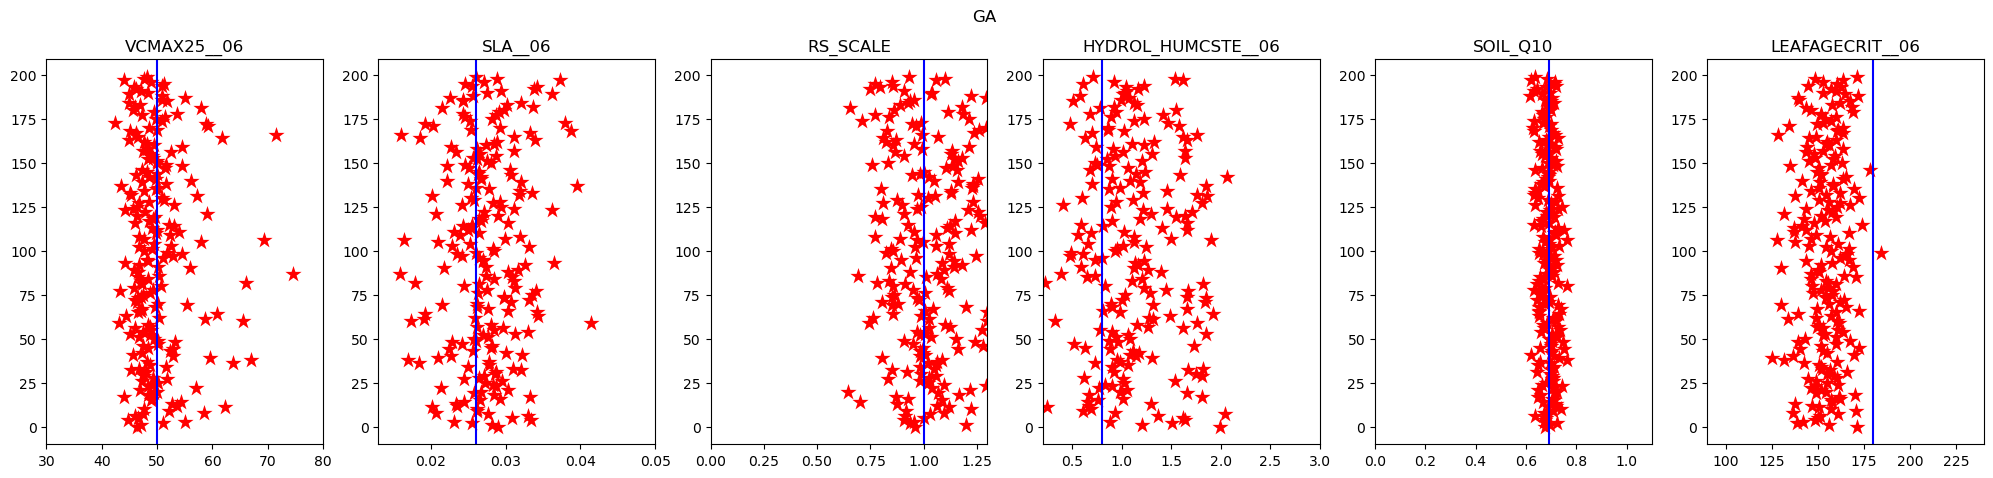

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=6,sharex=False,sharey=False,figsize=(25,5))
ax=ax.flatten()
 
for i in range(6):
    data= Table2.loc[Table2['PARAMETER'] == params[i]]
    ax[i].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
#     ax[i].scatter(data['FG'],[l for l in range(len(data['POST']))],linewidths = 1,marker ="1",color ="#000000",s = 50)

    ax[i].set_xlim(scale[params[i]])
    ax[i].set_title(f'{params[i]}')
    ax[i].axvline(x = true[i] , color = 'b')

fig.suptitle('GA')

In [76]:
PATH="Stochastic/GA/"


SW=os.listdir(f"{PATH}")
out="/output_*.nc"

nee=[]
le=[]

nee_post=[]
le_post=[]

SW=os.listdir(f"{PATH}")
for each in SW:
    path=PATH+each+out
    file=os.popen(f"ls {path}").read()
    file=file.replace('\n','')
    ds=netCDF4.Dataset(file)
    try:
        nee.append(ds['data_site0_var0'][:][1].data)
        le.append(ds['data_site0_var1'][:][1].data)
        nee_post.append(ds['data_site0_var0'][:][3].data)
        le_post.append(ds['data_site0_var1'][:][3].data)
    except IndexError:
        print(each)
        print('IndexError')
        
dsle=pd.DataFrame(le).transpose()
dsnee=pd.DataFrame(nee).transpose()

dslep=pd.DataFrame(le_post).transpose()
dsneep=pd.DataFrame(nee_post).transpose()

ds=netCDF4.Dataset("/home/surface5/nraoult/HistoryMatching_pv3/prior_FR-FON_2005_noise_NEE.nc")

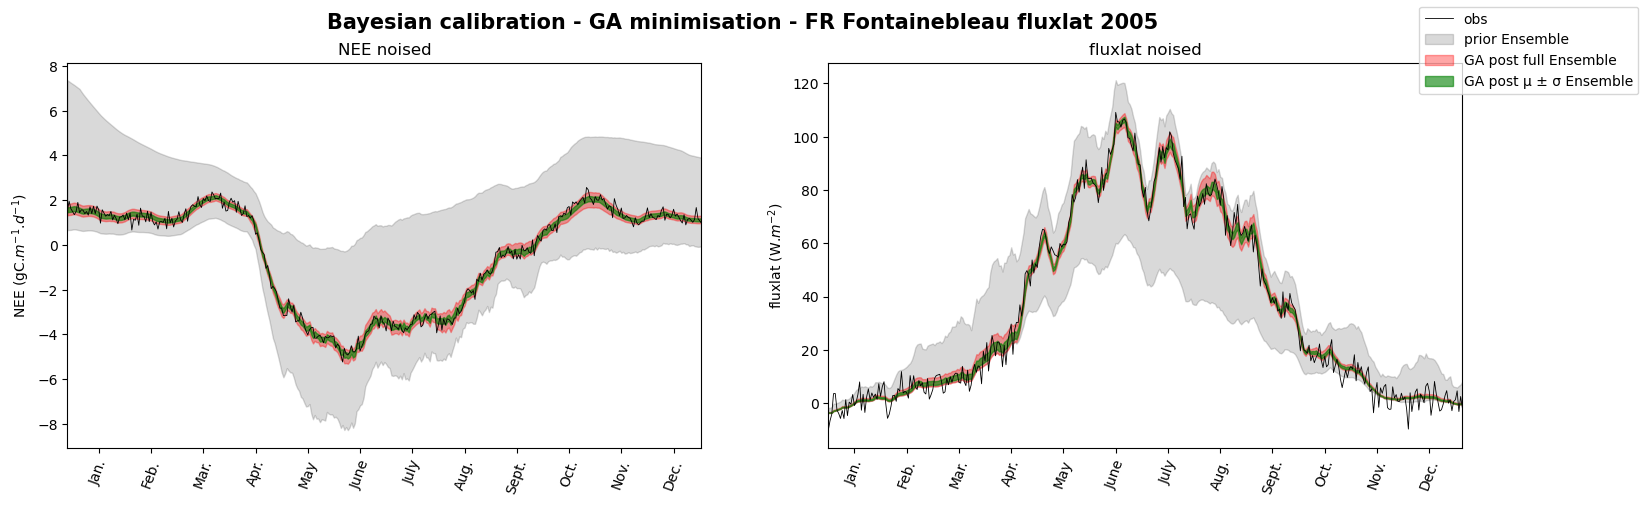

In [79]:

fig, ax = plt.subplots(nrows=1, ncols=2,sharex=False,sharey=False,figsize=(18,5))
ax = ax.flatten()


ax[0].plot(ds["NEEt_noise"][:],color='black',lw=0.6,label='obs')
ax[0].fill_between([i for i in range(365)],dsnee.quantile(0.00,axis=1),dsnee.quantile(1,axis=1),color='black',alpha=0.15,label='prior Ensemble')
ax[0].fill_between([i for i in range(365)],dsneep.quantile(0.00,axis=1),dsneep.quantile(1,axis=1),color='red',alpha=0.35,label='GA post full Ensemble')
ax[0].fill_between([i for i in range(365)],dsneep.mean(axis=1)-dsneep.std(axis=1),dsneep.mean(axis=1)+dsneep.std(axis=1),color='green',alpha=0.6,label='GA post μ ± σ Ensemble')

ax[0].set_xticks([18+30*i for i in range(12)])
ax[0].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','June','July','Aug.','Sept.','Oct.','Nov.','Dec.'],rotation=70)
ax[0].set_title('NEE noised')
ax[0].set_ylabel(r'NEE (gC.$m^{-1}$.$d^{-1}$)')

ax[1].plot(ds["fluxlat_noise"][:],color='black',lw=0.6)
ax[1].fill_between([i for i in range(365)],dsle.quantile(0,axis=1),dsle.quantile(1,axis=1),color='black',alpha=0.15)
ax[1].fill_between([i for i in range(365)],dslep.quantile(0,axis=1),dslep.quantile(1,axis=1),color='red',alpha=0.35)
ax[1].fill_between([i for i in range(365)],dslep.mean(axis=1)-dslep.std(axis=1),dslep.mean(axis=1)+dslep.std(axis=1),color='green',alpha=0.6)

ax[1].set_xticks([15+30*i for i in range(12)])
ax[1].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','June','July','Aug.','Sept.','Oct.','Nov.','Dec.'],rotation=70)
ax[1].set_title('fluxlat noised')
ax[1].set_ylabel(r'fluxlat (W.$m^{-2}$)')


fig.suptitle('Bayesian calibration - GA minimisation - FR Fontainebleau fluxlat 2005',fontweight ="bold",fontsize=15)
fig.legend()

for i in range(2):ax[i].margins(x=0.0)
    
plt.savefig('ArticlePlots/Stochastic_GA_unc_TS')

In [16]:
PATH="Stochastic/BFGS/"


SW=os.listdir(f"{PATH}")
out="/output_*.nc"

nee=[]
le=[]

nee_post=[]
le_post=[]
param=dict()
SW=os.listdir(f"{PATH}")
for each in SW:
    path=PATH+each+out
    file=os.popen(f"ls {path}").read()
    file=file.replace('\n','')
    ds=netCDF4.Dataset(file)
    param[each]=pd.DataFrame(ds['param'][:].data)
    

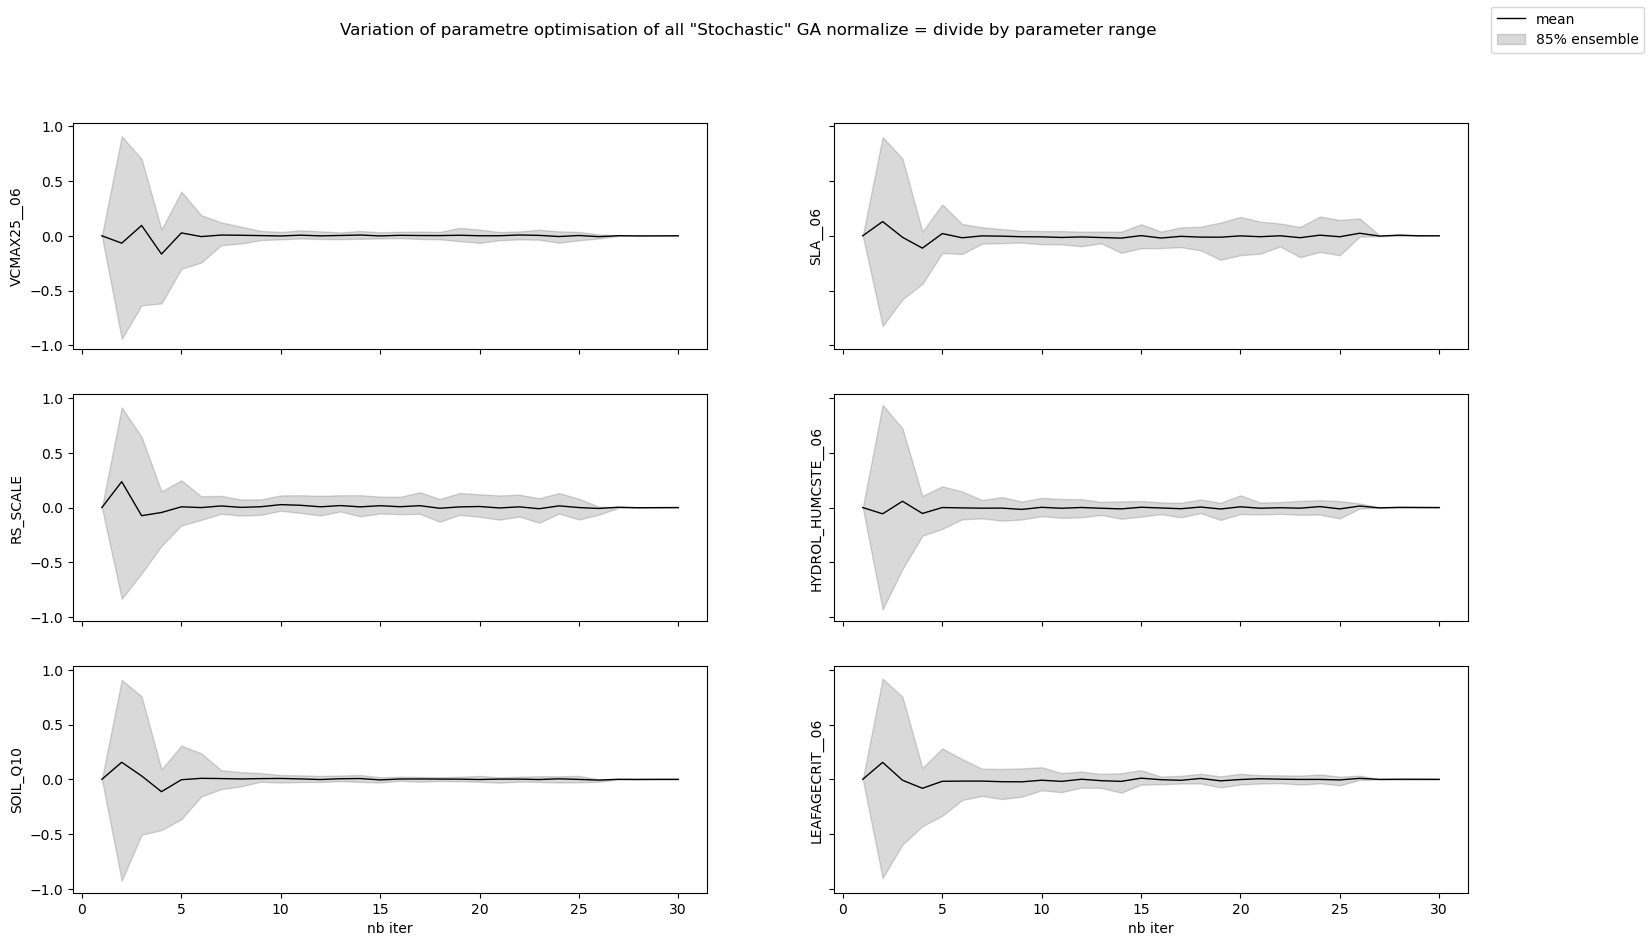

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2,sharex=True,sharey=True,figsize=(18,10))
ax = ax.flatten()

for i in range(len(params)):
    
    diff=[]
    for each in SW:
        diff.append(param[each][i].diff())
        dsdiff=pd.DataFrame(diff)
    ax[i].plot(dsdiff.mean()/(scale[params[i]][1]-scale[params[i]][0]),color='black',lw=1)
    ax[i].fill_between([i for i in range(len(dsdiff.mean()))],dsdiff.quantile(0.075)/(scale[params[i]][1]-scale[params[i]][0]),dsdiff.quantile(0.925)/(scale[params[i]][1]-scale[params[i]][0]),color='black',alpha=0.15)
#     ax[i].fill_between([i for i in range(len(dsdiff.mean()))],(dsdiff.mean()-dsdiff.std())/(scale[params[i]][1]-scale[params[i]][0]),(dsdiff.mean()+dsdiff.std())/(scale[params[i]][1]-scale[params[i]][0]),color='red',alpha=0.5)
    ax[i].set_ylabel(f'{params[i]}')
ax[5].set_xlabel(f'nb iter')
ax[4].set_xlabel(f'nb iter')
fig.suptitle('Variation of parametre optimisation of all "Stochastic" GA normalize = divide by parameter range')
fig.legend(['mean','85% ensemble'])


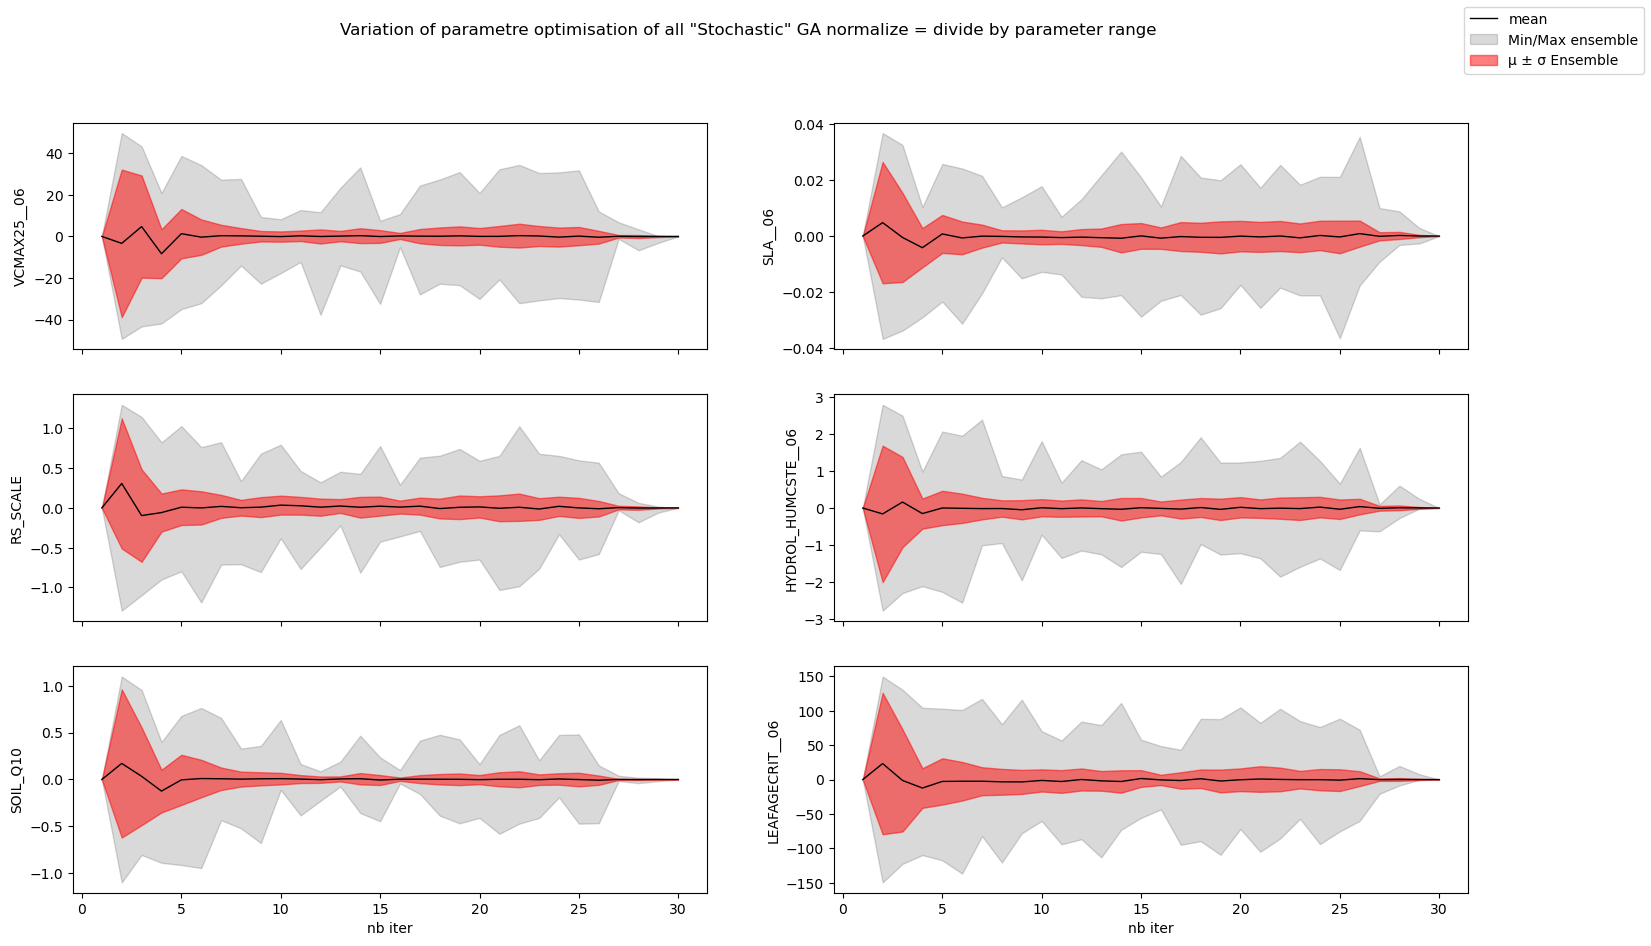

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=2,sharex=True,sharey=False,figsize=(18,10))
ax = ax.flatten()

for i in range(len(params)):
    
    diff=[]
    for each in SW:
        diff.append(param[each][i].diff())
        dsdiff=pd.DataFrame(diff)
    ax[i].plot(dsdiff.mean(),color='black',lw=1)
    ax[i].fill_between([i for i in range(len(dsdiff.mean()))],dsdiff.min(),dsdiff.max(),color='black',alpha=0.15)
    ax[i].fill_between([i for i in range(len(dsdiff.mean()))],(dsdiff.mean()-dsdiff.std()),(dsdiff.mean()+dsdiff.std()),color='red',alpha=0.5)
    ax[i].set_ylabel(f'{params[i]}')
ax[5].set_xlabel(f'nb iter')
ax[4].set_xlabel(f'nb iter')
fig.suptitle('Variation of parametre optimisation of all "Stochastic" GA normalize = divide by parameter range')
fig.legend(['mean','Min/Max ensemble','μ ± σ Ensemble'])

In [21]:
PATH="Stochastic/GA/"


SW=os.listdir(f"{PATH}")
out="/output_*.nc"

nee=[]
le=[]

nee_post=[]
le_post=[]
J=dict()
J_post=dict()
J_post_it=dict()
SW=os.listdir(f"{PATH}")
for each in SW:
    path=PATH+each+out
    file=os.popen(f"ls {path}").read()
    file=file.replace('\n','')
    try:
        ds=netCDF4.Dataset(file)
        costs = ds["J"][:]
        population = 24
        J_each = list()
        J_each.append(costs[0])
        for idx in range(math.floor((len(costs) - 2) / population)):
            J_each.append(costs[1+idx*population : 1+(idx+1)*population].min())

        J[each]=J_each
        J_post[each]=ds['J'][-1].data
        try:
            J_post_it[each]=np.where(J[each]==J_post[each])[0][0]
        except IndexError:
            print(each)
            print('indec')

    except ValueError:
        print(each)
J_total=dict()
for i in range(27):
    try:
        J_total[i]=pd.DataFrame(J_post_it.values()).value_counts().sort_index()[i]
    except KeyError:
        J_total[i]=0

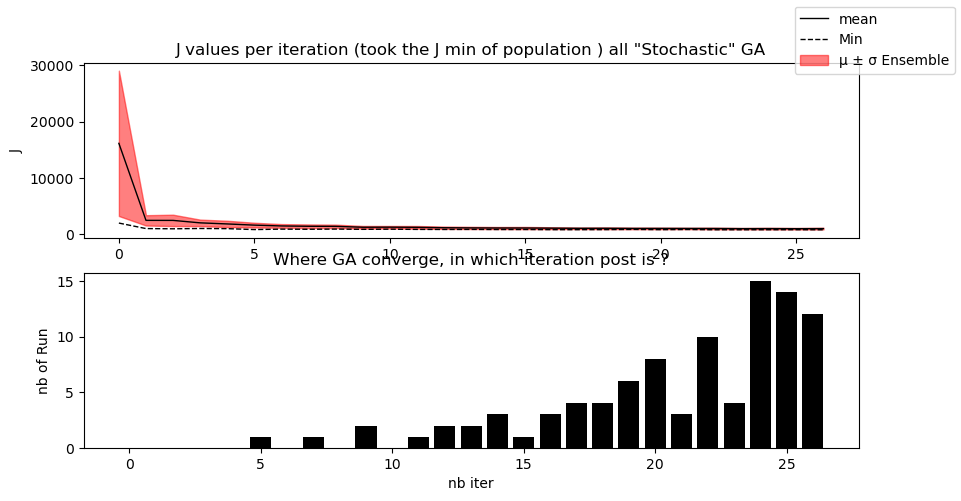

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1,sharex=False,sharey=False,figsize=(10,5))
# ax = ax.flatten()


    
diff=[]

for each in SW:
    try:
        diff.append(J[each])
        dsdiff=pd.DataFrame(diff)
        
    except KeyError:
        pass
i=0
ax[i].plot(dsdiff.mean(),color='black',lw=1)
ax[i].plot(dsdiff.min(),'--',color='black',lw=1)
ax[i].fill_between([i for i in range(len(dsdiff.mean()))],(dsdiff.mean()-dsdiff.std()),(dsdiff.mean()+dsdiff.std()),color='red',alpha=0.5)
ax[i].set_ylabel(f'J')
ax[i].set_title('J values per iteration (took the J min of population ) all "Stochastic" GA')

i=1
ax[i].bar([i for i in range(27)],J_total.values(),color='black',lw=2)
ax[i].set_xlabel(f'nb iter')
ax[i].set_ylabel(f'nb of Run')
ax[i].set_title('Where GA converge, in which iteration post is ?')

fig.legend(['mean','Min','μ ± σ Ensemble'])

In [53]:
J_total=dict()
for i in range(27):
    try:
        J_total[i]=pd.DataFrame(J_post_it.values()).value_counts().sort_index()[i]
    except KeyError:
        J_total[i]=0

In [54]:
sum(J_total.values())

182

<AxesSubplot:>

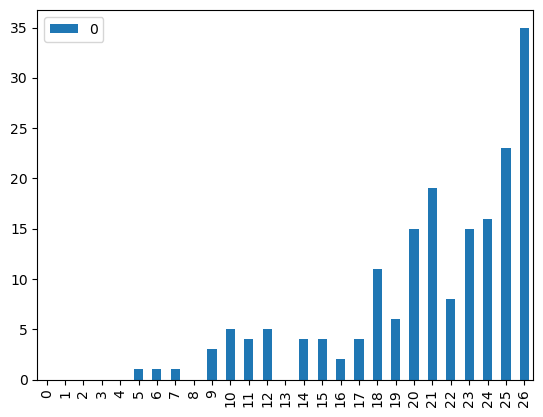

In [61]:
pd.DataFrame(J_total.values()).plot(kind='bar')

In [13]:
Table['PARAMETER'].unique()

array(['VCMAX25__06', 'SLA__06', 'RS_SCALE', 'HYDROL_HUMCSTE__06',
       'SOIL_Q10', 'LEAFAGECRIT__06'], dtype=object)

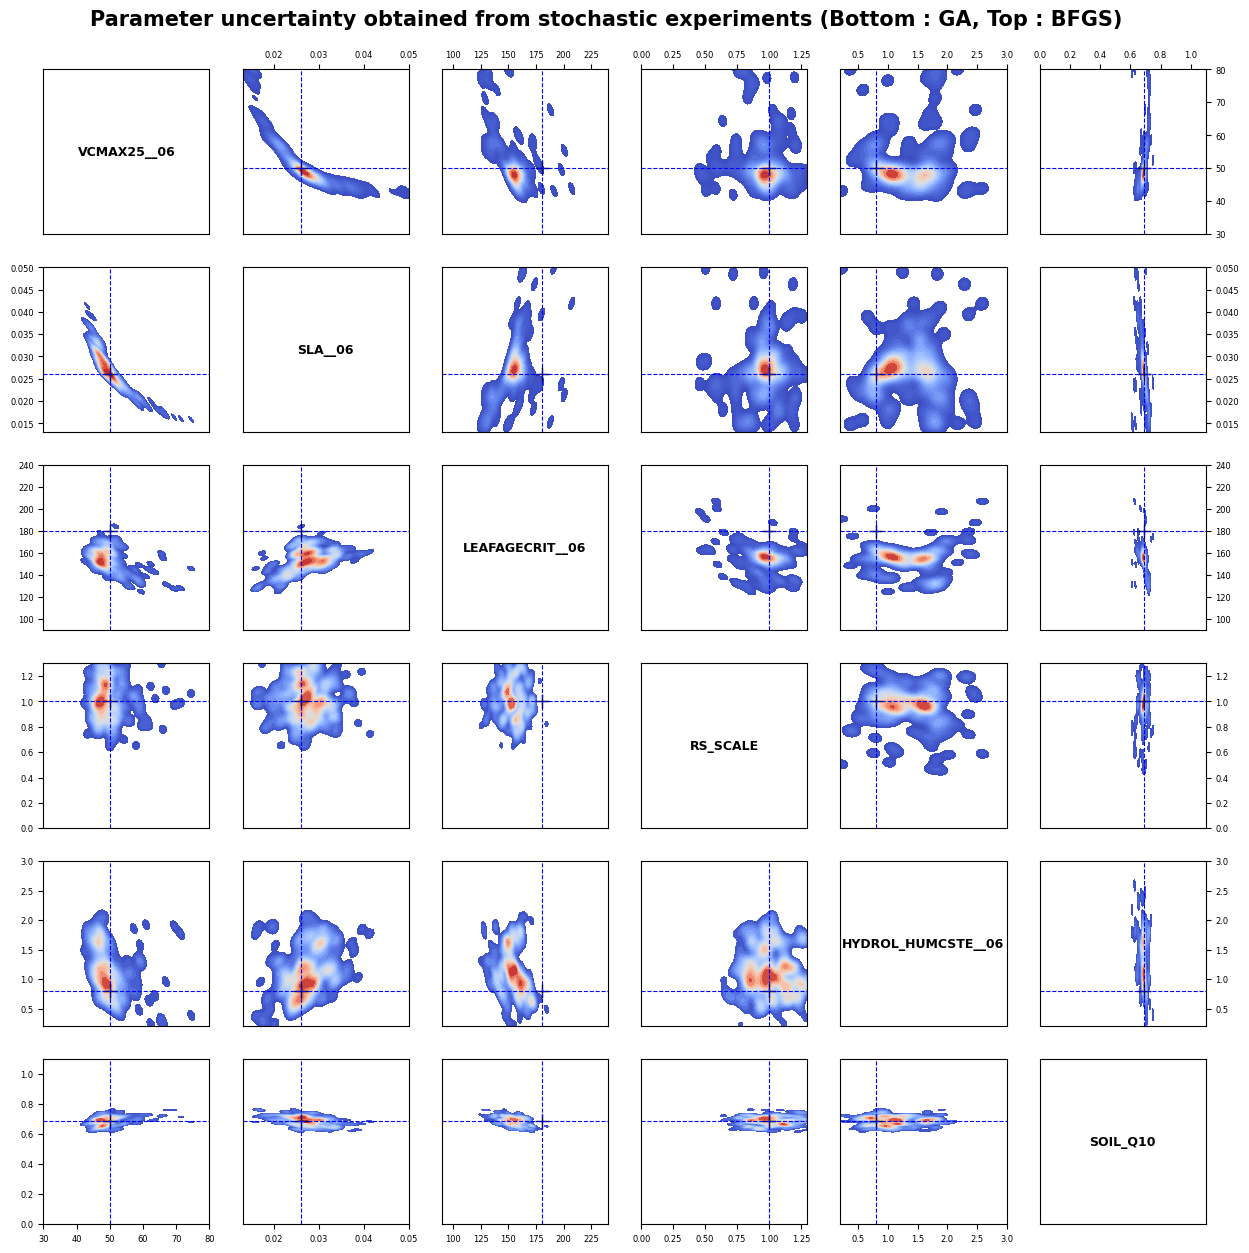

In [74]:
fig, ax = plt.subplots(nrows=6, ncols=6,sharex=False,sharey=False,figsize=(15,15))
scale=dict()
key="VCMAX25__06"
value=[30,80]
scale[key]=value
key="SLA__06"
value=[0.013,0.05]
scale[key]=value
key="RS_SCALE"
value=[0, 1.3]
scale[key]=value
key="HYDROL_HUMCSTE__06"
value=[0.2, 3.0]
scale[key]=value
key="SOIL_Q10"
value=[0, 1.1]
scale[key]=value
key="LEAFAGECRIT__06"
value=[90, 240]
scale[key]=value


true=[50,0.026,180,1,0.8,0.69]
params=['VCMAX25__06', 'SLA__06','LEAFAGECRIT__06', 'RS_SCALE', 'HYDROL_HUMCSTE__06',
       'SOIL_Q10']
#params=Table['PARAMETER'].unique()
to_del=[]
for i in range(len(params)):
    for j in range(len(params)):
        if i <j:
            data1 = Table.loc[Table['PARAMETER'] == params[j]]
            data2 = Table.loc[Table['PARAMETER'] == params[i]]
#             h=ax[i,j].hist2d(data1['POST'],data2['POST'],bins=20,cmap='ocean_r',vmin=0, vmax=10)
            h=sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="coolwarm",levels=20, shade=True, bw_adjust=0.5,ax=ax[i,j],common_grid=True)
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[i,j].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
        elif i == j:
            to_del.append([i,j])
        else: 
            
            data1 = Table2.loc[Table2['PARAMETER'] == params[j]]
            data2 = Table2.loc[Table2['PARAMETER'] == params[i]]

            sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="coolwarm",common_norm=False, shade=True,levels=20, bw_adjust=0.5,ax=ax[i,j])
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[i,j].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
            
for i in range(len(params)):
    ax[i,i].text(0.5, 0.5, params[i], horizontalalignment='center', verticalalignment='center', transform=ax[i,i].transAxes,fontsize=9,fontweight ="bold")
    ax[i,i].yaxis.set_visible(False)
    ax[i,i].xaxis.set_visible(False)

fig.suptitle(f'Parameter uncertainty obtained from stochastic experiments (Bottom : GA, Top : BFGS)',y=0.92,fontweight ="bold",fontsize=15)


for i in range(6):
    for j in range(6):
        ax[i,j].xaxis.set_visible(False)
        ax[i,j].yaxis.set_visible(False)
for i in range(6):
    if i>0:
        ax[i,0].yaxis.set_visible(True) 
        ax[0,i].xaxis.set_visible(True) 
        ax[0,i].xaxis.tick_top()
        ax[i,0].tick_params(axis='y', labelsize=6)
        ax[0,i].tick_params(axis='x', labelsize=6)

    if i<5:
        ax[i,5].yaxis.set_visible(True)
        ax[i,5].yaxis.tick_right()
        ax[5,i].xaxis.set_visible(True) 
        ax[i,5].tick_params(axis='y', labelsize=6)
        ax[5,i].tick_params(axis='x', labelsize=6)
        
plt.savefig('ArticlePlots/Stochastic_unc_param',dpi=150)

Text(0.5, 0.98, 'BFGS')

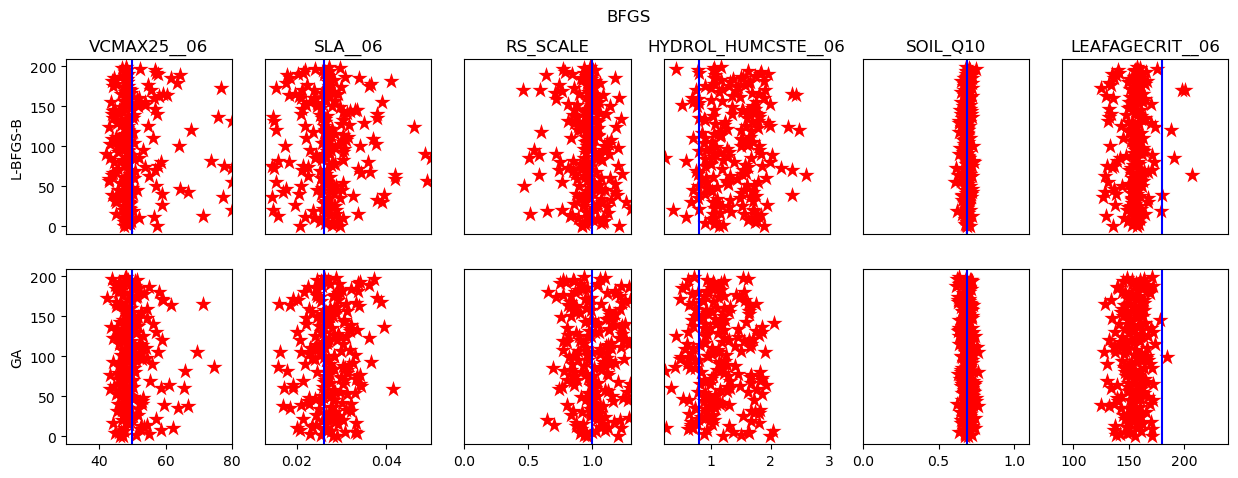

In [83]:
fig, ax = plt.subplots(nrows=2, ncols=6,sharex=False,sharey=False,figsize=(15,5))
ax=ax.flatten()
 
for i in range(6):
    data= Table.loc[Table['PARAMETER'] == params[i]]
    ax[i].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
#     ax[i].scatter(data['FG'],[l for l in range(len(data['POST']))],linewidths = 1,marker ="1",color ="#000000",s = 50)

    ax[i].set_xlim(scale[params[i]])
    ax[i].set_title(f'{params[i]}')
    ax[i].axvline(x = true[i] , color = 'b')

    data= Table2.loc[Table2['PARAMETER'] == params[i]]
    ax[i+6].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
#     ax[i].scatter(data['FG'],[l for l in range(len(data['POST']))],linewidths = 1,marker ="1",color ="#000000",s = 50)

    ax[i+6].set_xlim(scale[params[i]])
    ax[i+6].axvline(x = true[i] , color = 'b')
    ax[i].xaxis.set_visible(False)

for i in range(1,6):
    ax[i].yaxis.set_visible(False)
    ax[i+6].yaxis.set_visible(False)
    
ax[0].set_ylabel('L-BFGS-B')
ax[6].set_ylabel('GA')
fig.suptitle('Parameter uncertainty obtained from stochastic experiments (Bottom : GA, Top : BFGS)')

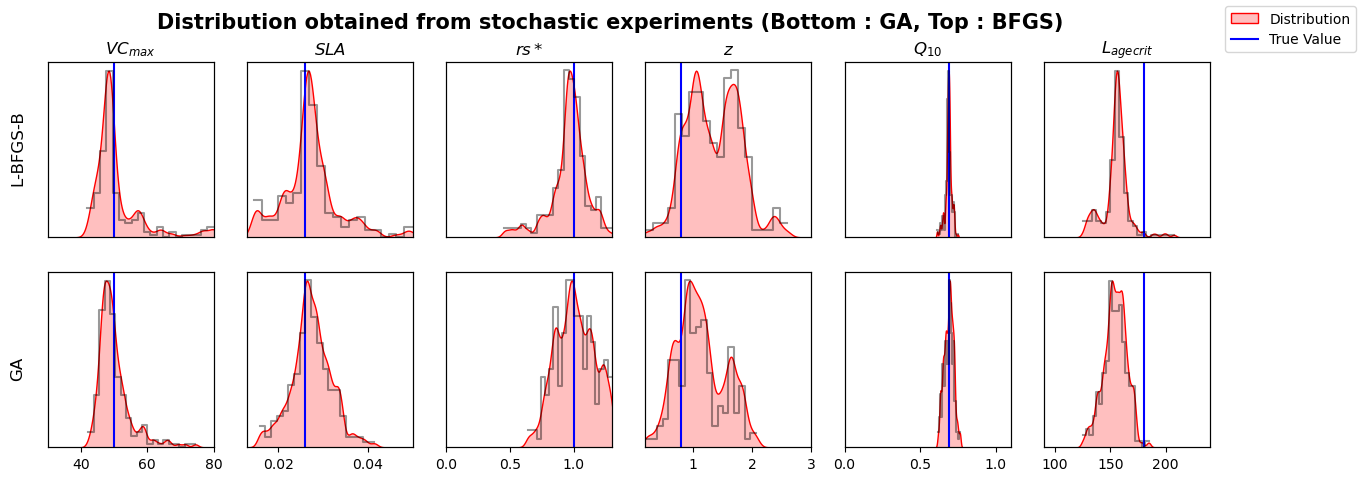

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=6,sharex=False,sharey=False,figsize=(15,5))
ax=ax.flatten()
 
for i in range(6):
    data= Table.loc[Table['PARAMETER'] == params[i]]
#     ax[i].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
    axtwinx = ax[i].twinx()
    sns.kdeplot(data['POST'].values, bw_adjust=0.5,ax=ax[i],color='Red',shade=True)
    sns.histplot(data['POST'].values, ax=axtwinx,color='Black',element="step", fill=False, bins=20,alpha=0.4)
    ax[i].set_xlim(scale[params[i]])
    ax[i].set_title(f'{names[params[i]]}')
    ax[i].axvline(x = true[i] , color = 'b')
    axtwinx.yaxis.set_visible(False)
    
    axtwinx = ax[i+6].twinx()
    data= Table2.loc[Table2['PARAMETER'] == params[i]]
#     ax[i+6].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
    sns.histplot(data['POST'].values, ax=axtwinx,color='Black',element="step", fill=False, bins=20,alpha=0.4)
    sns.kdeplot(data['POST'].values, bw_adjust=0.5,ax=ax[i+6],color='Red',shade=True)
    axtwinx.yaxis.set_visible(False)
#     ax[i].scatter(data['FG'],[l for l in range(len(data['POST']))],linewidths = 1,marker ="1",color ="#000000",s = 50)

    ax[i+6].set_xlim(scale[params[i]])
    ax[i+6].axvline(x = true[i] , color = 'b')
    ax[i].xaxis.set_visible(False)

for i in range(0,6):
    ax[i].yaxis.set_visible(False)
    ax[i+6].yaxis.set_visible(False)
    
    
plt.text(0.1,0.64, 'L-BFGS-B',rotation='vertical', fontsize = 12,transform=fig.transFigure)
plt.text(0.1,0.25, 'GA',rotation='vertical', fontsize = 12,transform=fig.transFigure)
fig.legend(['Distribution','True Value'])
ax[0].set_ylabel('BFGS')
ax[6].set_ylabel('GA')
fig.suptitle('Distribution obtained from stochastic experiments (Bottom : GA, Top : BFGS)',fontweight ="bold",fontsize=15)
plt.savefig('ArticlePlots/Stochastic_Dist_param',dpi=200)

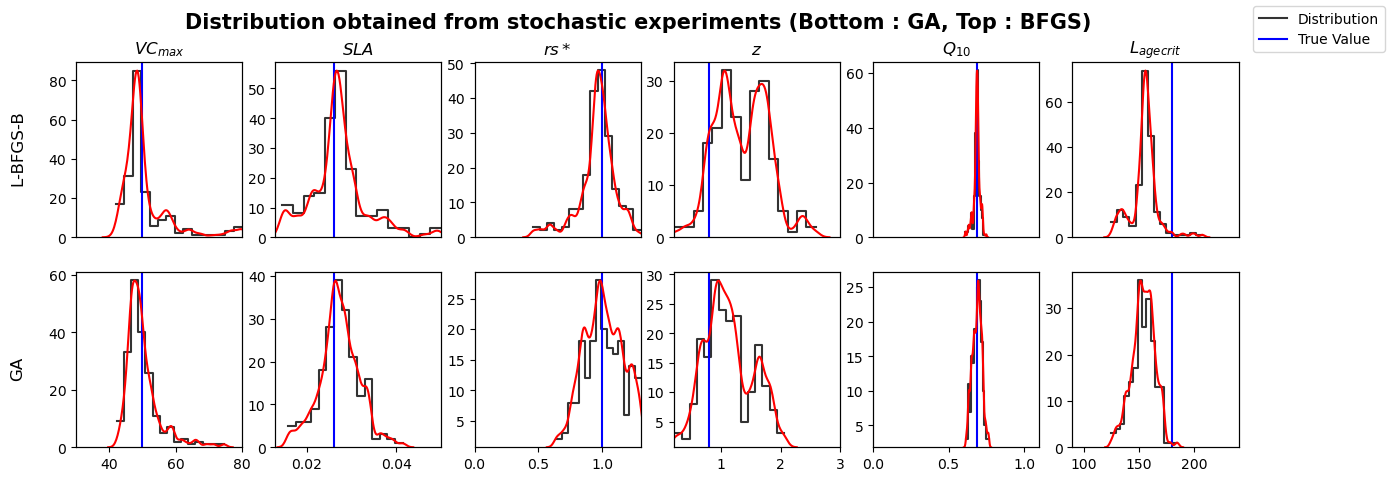

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=6,sharex=False,sharey=False,figsize=(15,5))
ax=ax.flatten()
 
for i in range(6):
    data= Table.loc[Table['PARAMETER'] == params[i]]
#     ax[i].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
    axtwinx = ax[i].twinx()
    sns.kdeplot(data['POST'].values, bw_adjust=0.5,ax=axtwinx,color='Red',shade=False)
    sns.histplot(data['POST'].values, ax=ax[i],color='Black',element="step", fill=False, bins=15,alpha=0.8)
    ax[i].set_xlim(scale[params[i]])
    ax[i].set_title(f'{names[params[i]]}')
    ax[i].axvline(x = true[i] , color = 'b')
    axtwinx.yaxis.set_visible(False)
    
    axtwinx = ax[i+6].twinx()
    data= Table2.loc[Table2['PARAMETER'] == params[i]]
#     ax[i+6].scatter(data['POST'],[l for l in range(len(data['POST']))],linewidths = 0,marker ="*",color ="#FF0000",s = 150)
    sns.histplot(data['POST'].values, ax=ax[i+6],color='Black',element="step", fill=False, bins=15,alpha=0.8)
    sns.kdeplot(data['POST'].values, bw_adjust=0.5,ax=axtwinx,color='Red',shade=False)
    axtwinx.yaxis.set_visible(False)
#     ax[i].scatter(data['FG'],[l for l in range(len(data['POST']))],linewidths = 1,marker ="1",color ="#000000",s = 50)

    ax[i+6].set_xlim(scale[params[i]])
    ax[i+6].axvline(x = true[i] , color = 'b')
    ax[i].xaxis.set_visible(False)

for i in range(0,6):
#     ax[i].yaxis.set_visible(False)
#     ax[i+6].yaxis.set_visible(False)
    ax[i].set_ylabel(' ')
    ax[i+6].set_ylabel(' ')
    
plt.text(0.081,0.64, 'L-BFGS-B',rotation='vertical', fontsize = 12,transform=fig.transFigure)
plt.text(0.081,0.25, 'GA',rotation='vertical', fontsize = 12,transform=fig.transFigure)
fig.legend(['Distribution','True Value'])
ax[0].set_ylabel(' ')
ax[6].set_ylabel(' ')
fig.suptitle('Distribution obtained from stochastic experiments (Bottom : GA, Top : BFGS)',fontweight ="bold",fontsize=15)
fig.tight_layout()
plt.savefig('ArticlePlots/Stochastic_Dist_param',dpi=200)

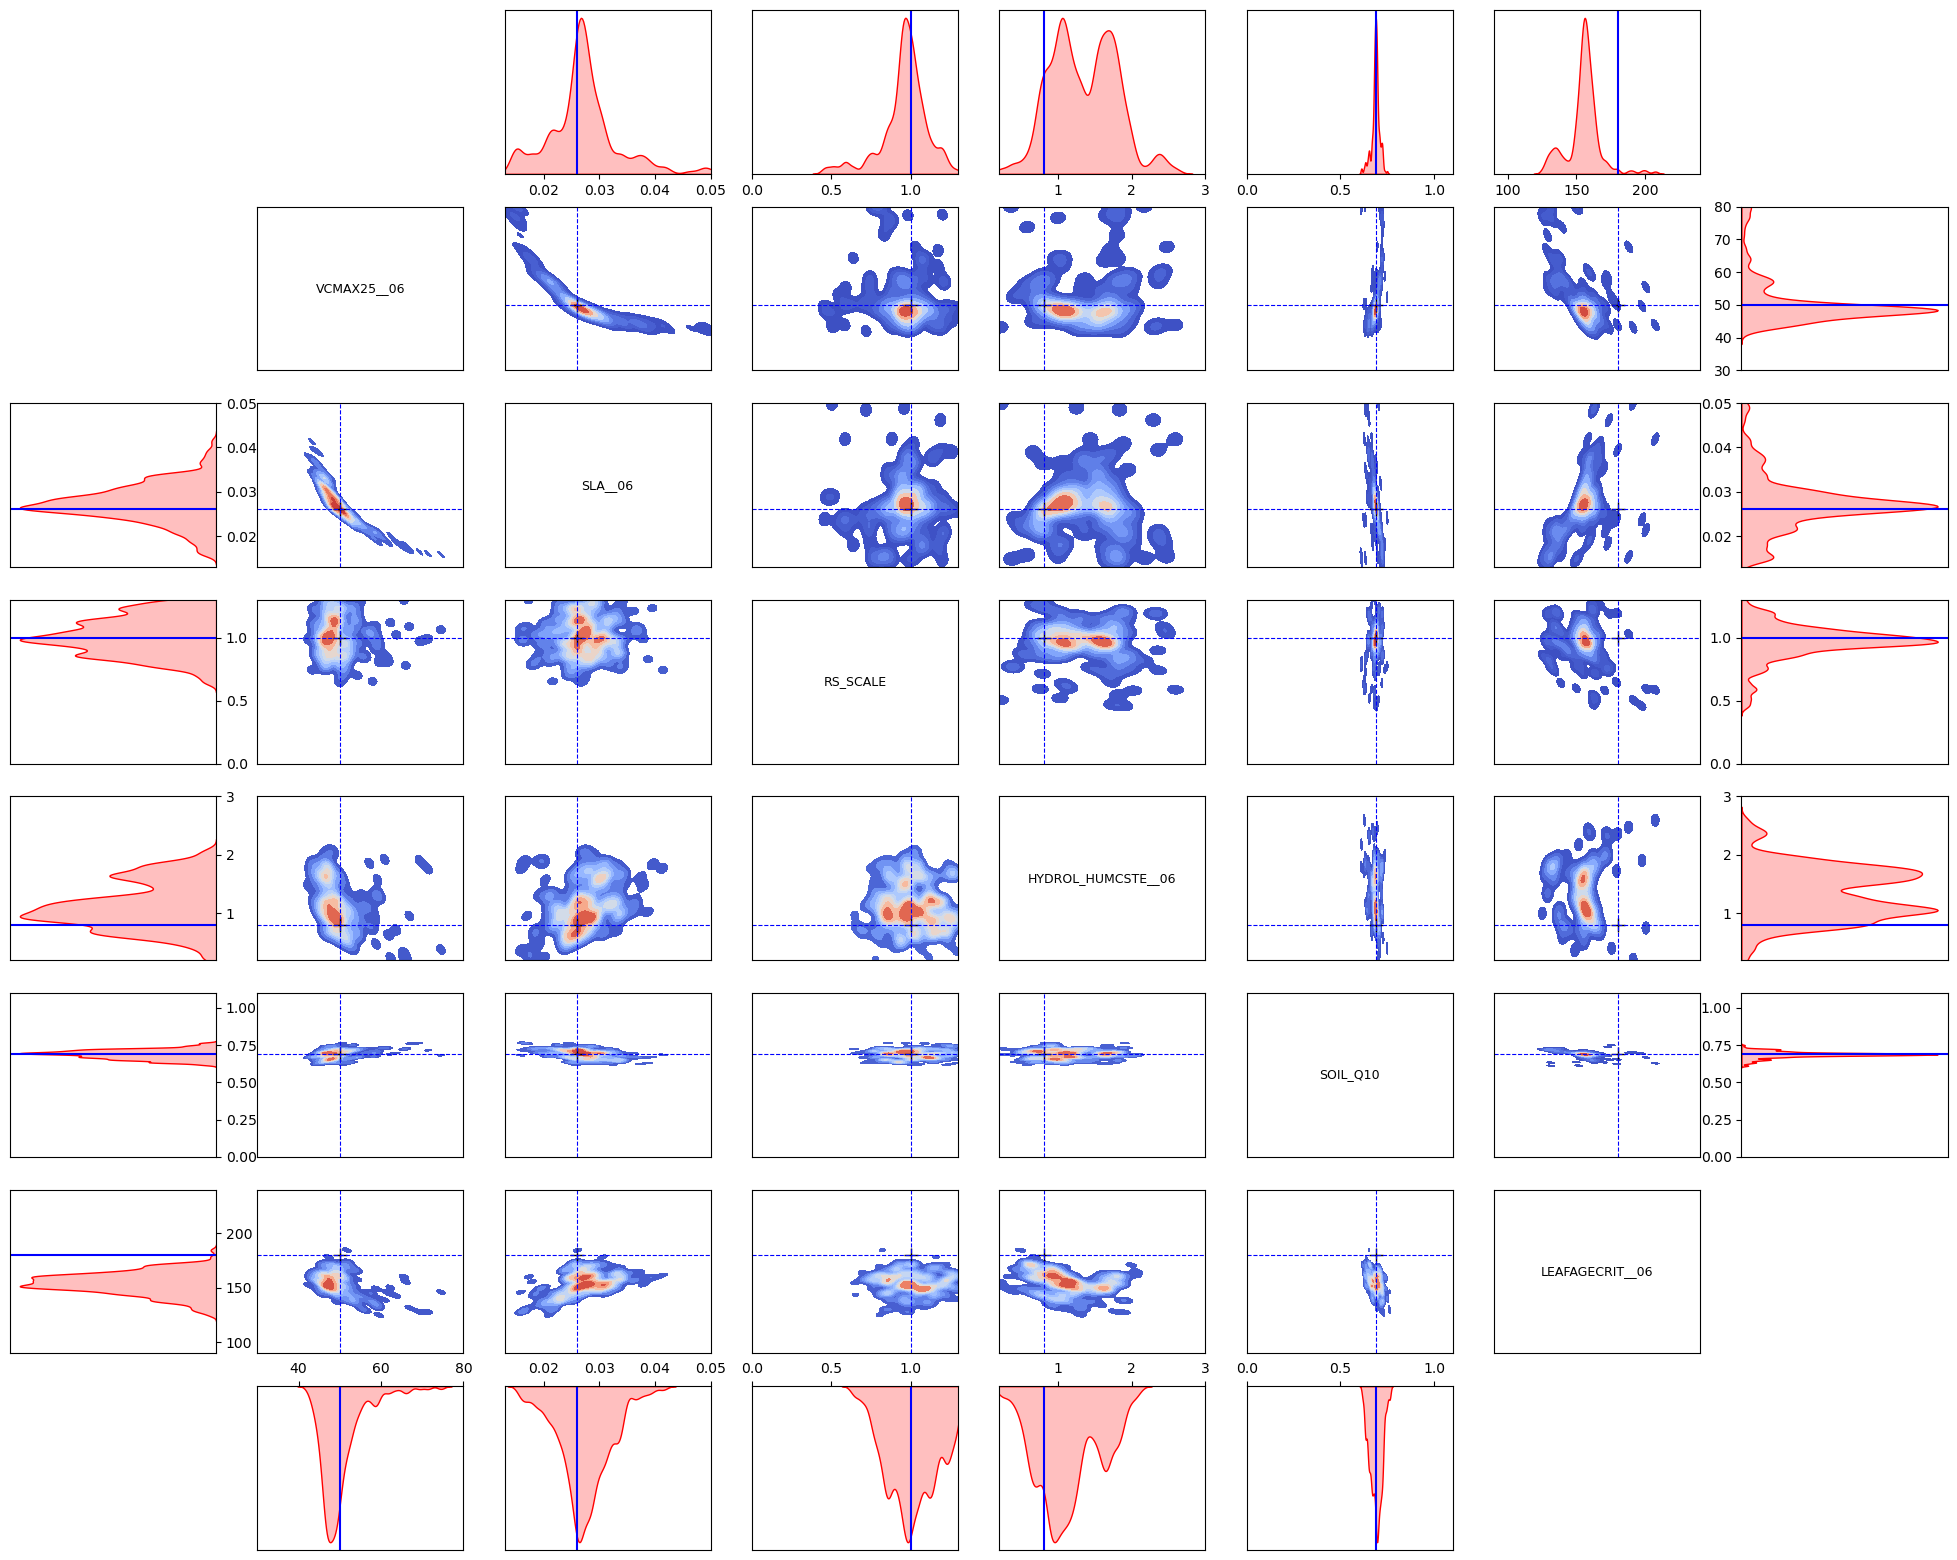

In [28]:
fig, ax = plt.subplots(nrows=8, ncols=8,sharex=False,sharey=False,figsize=(25,20))
scale=dict()
key="VCMAX25__06"
value=[30,80]
scale[key]=value
key="SLA__06"
value=[0.013,0.05]
scale[key]=value
key="RS_SCALE"
value=[0, 1.3]
scale[key]=value
key="HYDROL_HUMCSTE__06"
value=[0.2, 3.0]
scale[key]=value
key="SOIL_Q10"
value=[0, 1.1]
scale[key]=value
key="LEAFAGECRIT__06"
value=[90, 240]
scale[key]=value


true=[50,0.026,1,0.8,0.69,180]
params=Table['PARAMETER'].unique()
to_del=[]
for i in range(len(params)):
    for j in range(len(params)):
        x=i+1
        y=j+1
        if i <j:
            data1 = Table.loc[Table['PARAMETER'] == params[j]]
            data2 = Table.loc[Table['PARAMETER'] == params[i]]
#             h=ax[i,j].hist2d(data1['POST'],data2['POST'],bins=20,cmap='ocean_r',vmin=0, vmax=10)
            sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="coolwarm", shade=True, bw_adjust=0.5,ax=ax[x,y])
            ax[x,y].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[x,y].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[x,y].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[x,y].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[x,y].set_xlim(scale[params[j]][0], scale[params[j]][1])
        elif i == j:
            to_del.append([x,y])
        else: 
            
            data1 = Table2.loc[Table2['PARAMETER'] == params[j]]
            data2 = Table2.loc[Table2['PARAMETER'] == params[i]]

            sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="coolwarm", shade=True, bw_adjust=0.5,ax=ax[x,y])
            ax[x,y].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[x,y].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[x,y].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[x,y].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[x,y].set_xlim(scale[params[j]][0], scale[params[j]][1])
# for z in to_del:fig.delaxes(ax[z[0],z[1]])

for i in range(len(params)):
    x=i+1
    if x>0 or x<7:
        data= Table.loc[Table['PARAMETER'] == params[i]]
        data2= Table2.loc[Table2['PARAMETER'] == params[i]]

        sns.kdeplot(data['POST'].values, bw_adjust=0.5,ax=ax[0,x],color='Red',shade=True)
        sns.kdeplot(y=data['POST'].values, bw_adjust=0.5,ax=ax[x,7],color='Red',shade=True)

        ax[0,x].set_xlim(scale[params[i]])
        ax[0,x].axvline(x = true[i] , color = 'b')
        
        ax[x,7].set_ylim(scale[params[i]])
        ax[x,7].axhline(y = true[i] , color = 'b')
        
        sns.kdeplot(data2['POST'].values, bw_adjust=0.5,ax=ax[7,x],color='Red',shade=True)
        sns.kdeplot(y=data2['POST'].values, bw_adjust=0.5,ax=ax[x,0],color='Red',shade=True)

        ax[7,x].set_xlim(scale[params[i]])
        ax[7,x].axvline(x = true[i] , color = 'b')
        ax[7,x].xaxis.tick_top()
        ax[7,x].invert_yaxis()
        
        ax[x,0].set_ylim(scale[params[i]])
        ax[x,0].axhline(y = true[i] , color = 'b')
        ax[x,0].yaxis.tick_right()
        ax[x,0].invert_xaxis()
# fig.suptitle(f'"Stochastic" BFGSxGA')

for i in range(len(params)):
    x=i+1 
    ax[x,x].text(0.5, 0.5, params[i], horizontalalignment='center', verticalalignment='center', transform=ax[x,x].transAxes,fontsize=9)

for i in range(1,7):
    for j in range(1,7):
        ax[i,j].xaxis.set_visible(False)
        ax[i,j].yaxis.set_visible(False)
        
for i in range(8):
    ax[0,i].yaxis.set_visible(False)
    ax[i,0].xaxis.set_visible(False)
    ax[7,i].yaxis.set_visible(False)
    ax[i,7].xaxis.set_visible(False)

    
fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[1,0])

fig.delaxes(ax[7,0])


fig.delaxes(ax[7,7])
fig.delaxes(ax[7,6])
fig.delaxes(ax[6,7])

fig.delaxes(ax[0,7])


fig.savefig("stochastic",bbox_inches = "tight")


In [54]:
PATH="Stochastic/BFGS/"


SW=os.listdir(f"{PATH}")
out="/output_*.nc"

nee=[]
le=[]

nee_post=[]
le_post=[]
vcmax=[]
SW=os.listdir(f"{PATH}")
for each in SW:
    path=PATH+each+out
    file=os.popen(f"ls {path}").read()
    file=file.replace('\n','')
    ds=netCDF4.Dataset(file)
    try:
        nee.append(ds['data_site0_var0'][:][1].data)
        le.append(ds['data_site0_var1'][:][1].data)
        nee_post.append(ds['data_site0_var0'][:][3].data)
        le_post.append(ds['data_site0_var1'][:][3].data)
        vcmax.append(ds['param'][0][0])
    except IndexError:
        print('IndexError')
        
dsle=pd.DataFrame(le).transpose()
dsnee=pd.DataFrame(nee).transpose()

dslep=pd.DataFrame(le_post).transpose()
dsneep=pd.DataFrame(nee_post).transpose()

# ds=netCDF4.Dataset("/home/surface5/nraoult/HistoryMatching_pv3/prior_FR-FON_2005_noise_NEE.nc")

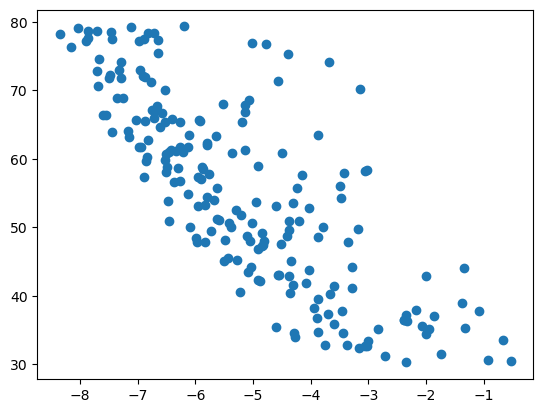

In [55]:
plt.scatter(dsnee.T.min(axis=1),vcmax)

In [44]:
dsnee.T.min(axis=1)

0     -7.470902
1     -4.603143
2     -5.834478
3     -6.666114
4     -8.041890
         ...   
195   -7.024690
196   -4.351965
197   -3.792905
198   -5.285438
199   -2.000023
Length: 200, dtype: float64

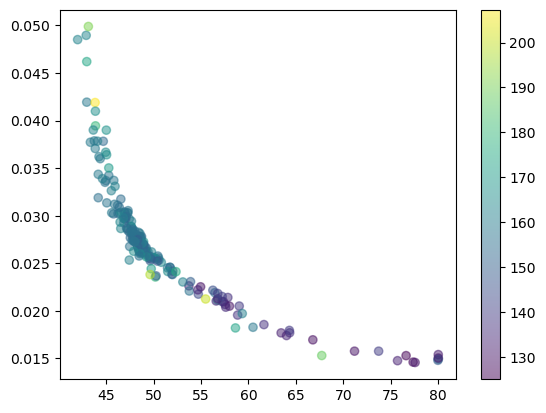

In [34]:

import matplotlib.pyplot as plt
import numpy as np
VCMAX=Table.loc[Table['PARAMETER']=="VCMAX25__06",'POST']
SLA=Table.loc[Table['PARAMETER']=="SLA__06",'POST']
HY=Table.loc[Table['PARAMETER']=="LEAFAGECRIT__06",'POST']
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = VCMAX
y = SLA
colors = HY

plt.scatter(x, y, c=colors, alpha=0.5)
plt.colorbar()
plt.show()

In [33]:
VCMAX=Table.loc[Table['PARAMETER']=="VCMAX25__06",'POST']
SLA=Table.loc[Table['PARAMETER']=="SLA__06",'POST']
HY=Table.loc[Table['PARAMETER']=="LEAFAGECRIT__06",'POST']

In [26]:
Table

,Run,PARAMETER,FG,POST
0,Stochastic/BFGS/L-BFGS-B_1/table.html,VCMAX25__06,39.60000,57.55000
1,Stochastic/BFGS/L-BFGS-B_1/table.html,SLA__06,0.02382,0.02067
2,Stochastic/BFGS/L-BFGS-B_1/table.html,RS_SCALE,0.90130,1.20700
3,Stochastic/BFGS/L-BFGS-B_1/table.html,HYDROL_HUMCSTE__06,2.76900,1.89700
4,Stochastic/BFGS/L-BFGS-B_1/table.html,SOIL_Q10,1.04200,0.71020
...,...,...,...,...
1,Stochastic/BFGS/L-BFGS-B_99/table.html,SLA__06,0.01315,0.02730
2,Stochastic/BFGS/L-BFGS-B_99/table.html,RS_SCALE,0.18780,0.98310
3,Stochastic/BFGS/L-BFGS-B_99/table.html,HYDROL_HUMCSTE__06,2.85500,1.16900
4,Stochastic/BFGS/L-BFGS-B_99/table.html,SOIL_Q10,0.61160,0.68510


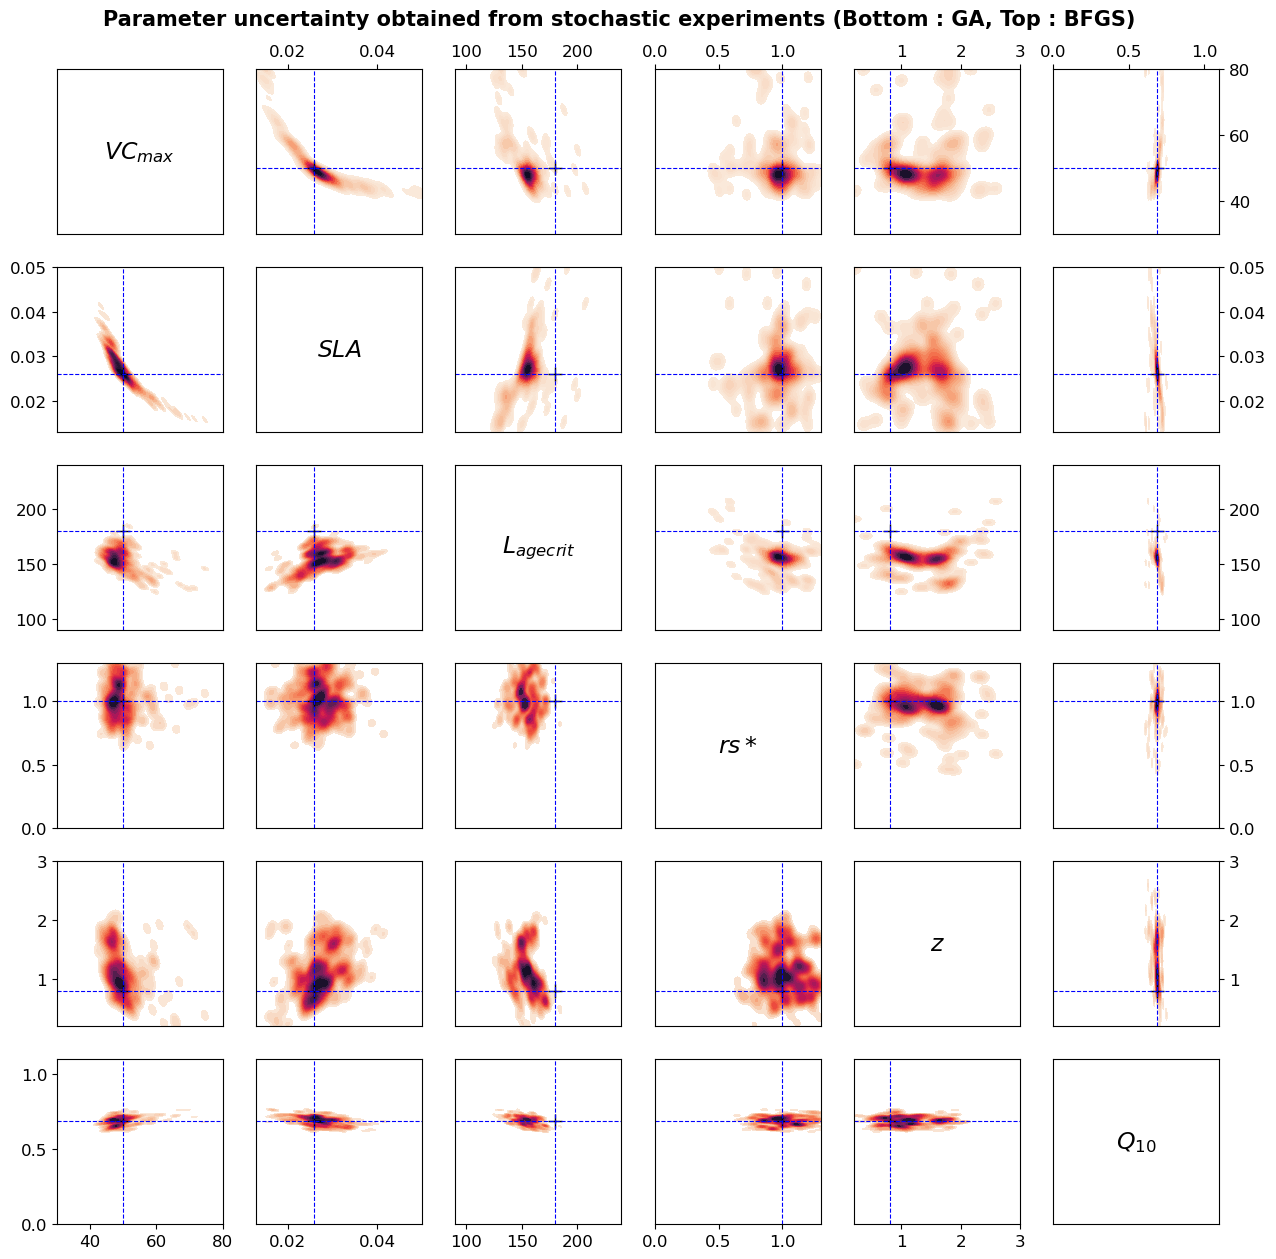

In [41]:
fig, ax = plt.subplots(nrows=6, ncols=6,sharex=False,sharey=False,figsize=(15,15))
scale=dict()
key="VCMAX25__06"
value=[30,80]
scale[key]=value
key="SLA__06"
value=[0.013,0.05]
scale[key]=value
key="RS_SCALE"
value=[0, 1.3]
scale[key]=value
key="HYDROL_HUMCSTE__06"
value=[0.2, 3.0]
scale[key]=value
key="SOIL_Q10"
value=[0, 1.1]
scale[key]=value
key="LEAFAGECRIT__06"
value=[90, 240]
scale[key]=value


true=[50,0.026,180,1,0.8,0.69]
params=['VCMAX25__06', 'SLA__06','LEAFAGECRIT__06', 'RS_SCALE', 'HYDROL_HUMCSTE__06',
       'SOIL_Q10']
#params=Table['PARAMETER'].unique()
to_del=[]
for i in range(len(params)):
    for j in range(len(params)):
        if i <j:
            data1 = Table.loc[Table['PARAMETER'] == params[j]]
            data2 = Table.loc[Table['PARAMETER'] == params[i]]
#             h=ax[i,j].hist2d(data1['POST'],data2['POST'],bins=20,cmap='ocean_r',vmin=0, vmax=10)
            h=sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="rocket_r",levels=20, shade=True, bw_adjust=0.5,ax=ax[i,j],common_grid=True)
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[i,j].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
        elif i == j:
            to_del.append([i,j])
        else: 
            
            data1 = Table2.loc[Table2['PARAMETER'] == params[j]]
            data2 = Table2.loc[Table2['PARAMETER'] == params[i]]

            sns.kdeplot(x=data1['POST'].values, y=data2['POST'].values,cmap="rocket_r",common_norm=False, shade=True,levels=20, bw_adjust=0.5,ax=ax[i,j])
            ax[i,j].scatter(true[j],true[i],linewidths = 1,marker ="+",color ="#000000",s = 100)
            ax[i,j].axvline(x = true[j] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].axhline(y = true[i] ,linestyle='--',linewidth=0.8, color = 'b')
            ax[i,j].set_ylim(scale[params[i]][0],scale[params[i]][1])
            ax[i,j].set_xlim(scale[params[j]][0], scale[params[j]][1])
            
for i in range(len(params)):
    ax[i,i].text(0.5, 0.5, names[params[i]], horizontalalignment='center', verticalalignment='center', transform=ax[i,i].transAxes,fontsize=17,fontweight ="bold")
    ax[i,i].yaxis.set_visible(False)
    ax[i,i].xaxis.set_visible(False)

fig.suptitle(f'Parameter uncertainty obtained from stochastic experiments (Bottom : GA, Top : BFGS)',y=0.92,fontweight ="bold",fontsize=15)


for i in range(6):
    for j in range(6):
        ax[i,j].xaxis.set_visible(False)
        ax[i,j].yaxis.set_visible(False)
for i in range(6):
    if i>0:
        ax[i,0].yaxis.set_visible(True) 
        ax[0,i].xaxis.set_visible(True) 
        ax[0,i].xaxis.tick_top()
        ax[i,0].tick_params(axis='y', labelsize=12)
        ax[0,i].tick_params(axis='x', labelsize=12)

    if i<5:
        ax[i,5].yaxis.set_visible(True)
        ax[i,5].yaxis.tick_right()
        ax[5,i].xaxis.set_visible(True) 
        ax[i,5].tick_params(axis='y', labelsize=12)
        ax[5,i].tick_params(axis='x', labelsize=12)
        
plt.savefig('ArticlePlots/Stochastic_unc_param',dpi=150)